In [99]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [100]:
from geopy.geocoders import Nominatim
import folium

In [101]:
url=requests.get('https://en.wikipedia.org/wiki/List_of_cities_in_Andhra_Pradesh_by_population').text

In [102]:
soup=BeautifulSoup(url,'lxml')

In [103]:
#soup

In [104]:
table=soup.find('table',{'class':'sortable wikitable'})
table

<table class="sortable wikitable" style="text-align:right;">
<tbody><tr>
<th>S.No.
</th>
<th>Name
</th>
<th>District
</th>
<th>Population<br/>(2011)<sup class="reference" id="cite_ref-:0_4-0"><a href="#cite_note-:0-4">[4]</a></sup><sup class="reference" id="cite_ref-civicbody_2-1"><a href="#cite_note-civicbody-2">[2]</a></sup>
</th>
<th>Population<br/>(2001)<sup class="reference" id="cite_ref-:0_4-1"><a href="#cite_note-:0-4">[4]</a></sup><sup class="reference" id="cite_ref-civicbody_2-2"><a href="#cite_note-civicbody-2">[2]</a></sup>
</th></tr>
<tr>
<td>1
</td>
<td align="left"><b><a href="/wiki/Visakhapatnam" title="Visakhapatnam">Visakhapatnam</a></b><sup class="reference" id="cite_ref-fn1_6-0"><a href="#cite_note-fn1-6">[a]</a></sup>
</td>
<td align="left"><a href="/wiki/Visakhapatnam_district" title="Visakhapatnam district">Visakhapatnam</a>
</td>
<td>2,035,922
</td>
<td>982,904
</td></tr>
<tr>
<td>2
</td>
<td align="left"><a href="/wiki/Vijayawada" title="Vijayawada">Vijayawada</

In [105]:
links=table.findAll('a')
links

[<a href="#cite_note-:0-4">[4]</a>,
 <a href="#cite_note-civicbody-2">[2]</a>,
 <a href="#cite_note-:0-4">[4]</a>,
 <a href="#cite_note-civicbody-2">[2]</a>,
 <a href="/wiki/Visakhapatnam" title="Visakhapatnam">Visakhapatnam</a>,
 <a href="#cite_note-fn1-6">[a]</a>,
 <a href="/wiki/Visakhapatnam_district" title="Visakhapatnam district">Visakhapatnam</a>,
 <a href="/wiki/Vijayawada" title="Vijayawada">Vijayawada</a>,
 <a href="/wiki/Krishna_district" title="Krishna district">Krishna</a>,
 <a href="/wiki/Guntur" title="Guntur">Guntur</a>,
 <a href="#cite_note-7">[6]</a>,
 <a href="/wiki/Guntur_district" title="Guntur district">Guntur</a>,
 <a href="/wiki/Nellore" title="Nellore">Nellore</a>,
 <a href="#cite_note-profile-8">[7]</a>,
 <a href="#cite_note-city-9">[8]</a>,
 <a href="/wiki/Nellore_district" title="Nellore district">Nellore</a>,
 <a href="/wiki/Kurnool" title="Kurnool">Kurnool</a>,
 <a href="/wiki/Kurnool_district" title="Kurnool district"> Kurnool</a>,
 <a href="/wiki/Rajahmu

In [106]:
cities=[]
for link in links:
    cities.append(link.get('title'))
cities

[None,
 None,
 None,
 None,
 'Visakhapatnam',
 None,
 'Visakhapatnam district',
 'Vijayawada',
 'Krishna district',
 'Guntur',
 None,
 'Guntur district',
 'Nellore',
 None,
 None,
 'Nellore district',
 'Kurnool',
 'Kurnool district',
 'Rajahmundry',
 'East Godavari district',
 'Kadapa',
 'Kadapa district',
 'Kakinada',
 'East Godavari district',
 'Tirupati',
 'Chittoor district',
 'Eluru',
 'West Godavari district',
 'Anantapur',
 'Anantapur district',
 'Vizianagaram',
 'Vizianagaram district',
 'Nandyal',
 'Kurnool district',
 'Ongole',
 'Prakasam district',
 'Adoni',
 'Kurnool district',
 'Madanapalle',
 'Chittoor district',
 'Machilipatnam',
 'Krishna district',
 'Tenali',
 'Guntur district',
 'Proddatur',
 'Kadapa district',
 'Chittoor',
 'Chittoor district',
 'Hindupur',
 'Anantapur district',
 'Bhimavaram',
 'West Godavari district',
 'Srikakulam',
 'Srikakulam district',
 'Guntakal',
 'Anantapur district',
 'Dharmavaram, Anantapur',
 'Anantapur district',
 'Gudivada',
 'Krishna 

In [107]:
type(cities[10])

NoneType

In [112]:
for i in cities:
    if i==None:
        cities.remove(i)
    elif 'district' in i:
        cities.remove(i)
        

In [113]:
cities

['Visakhapatnam',
 'Vijayawada',
 'Guntur',
 'Nellore',
 None,
 'Kurnool',
 'Rajahmundry',
 'Kadapa',
 'Kakinada',
 'Tirupati',
 'Eluru',
 'Anantapur',
 'Vizianagaram',
 'Nandyal',
 'Ongole',
 'Adoni',
 'Madanapalle',
 'Machilipatnam',
 'Tenali',
 'Proddatur',
 'Chittoor',
 'Hindupur',
 'Bhimavaram',
 'Srikakulam',
 'Guntakal',
 'Dharmavaram, Anantapur',
 'Gudivada',
 'Narasaraopet',
 'Tadipatri',
 'Tadepalligudem',
 'Chilakaluripet',
 'Amaravati (state capital)',
 'Kavali']

In [114]:
del cities[4]
df=pd.DataFrame()
df['cities']=cities

In [115]:
df

,cities
0,Visakhapatnam
1,Vijayawada
2,Guntur
3,Nellore
4,Kurnool
5,Rajahmundry
6,Kadapa
7,Kakinada
8,Tirupati
9,Eluru


In [116]:
def get_coords_local(cities, output_as='center'):
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search.php?q=',
                             cities+', Andhra Pradesh',
                             '&format=json&polygon=0')
    response = requests.get(url).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lat','lon']]
        output = [float(i) for i in lst]
    return output

In [117]:
df2 = df.copy()

latitudeCln = []
longitudeCln = []
for index, row in df2.iterrows():
    print(row[0])
    lat, long = get_coords_local(cities=row[0], output_as='center')
    latitudeCln.append(lat)
    longitudeCln.append(long)

df2['Latitude'] = latitudeCln
df2['Longitude'] = longitudeCln

df2.shape

Visakhapatnam
Vijayawada
Guntur
Nellore
Kurnool
Rajahmundry
Kadapa
Kakinada
Tirupati
Eluru
Anantapur
Vizianagaram
Nandyal
Ongole
Adoni
Madanapalle
Machilipatnam
Tenali
Proddatur
Chittoor
Hindupur
Bhimavaram
Srikakulam
Guntakal
Dharmavaram, Anantapur
Gudivada
Narasaraopet
Tadipatri
Tadepalligudem
Chilakaluripet
Amaravati (state capital)
Kavali


(32, 3)

In [118]:
df2

,cities,Latitude,Longitude
0,Visakhapatnam,17.723128,83.301284
1,Vijayawada,16.508759,80.618510
2,Guntur,16.291519,80.454159
3,Nellore,14.449372,79.987376
4,Kurnool,15.830925,78.042537
5,Rajahmundry,17.005045,81.780473
6,Kadapa,14.467149,78.822888
7,Kakinada,16.943738,82.235061
8,Tirupati,13.631637,79.423171
9,Eluru,16.710426,81.115382


In [119]:
address = 'Andhra Pradesh, India'

geolocator = Nominatim(user_agent="capstoneProject")
location = geolocator.geocode(address, timeout=60, exactly_one=True)
latitude = location.latitude
longitude = location.longitude
print('The decimal coordinates of Andhra Pradesh are {}, {}.'.format(latitude, longitude))

The decimal coordinates of Andhra Pradesh are 15.9240905, 80.1863809.


In [120]:
df3=df2.copy()

In [121]:
map_andhra = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, local in zip(df3['Latitude'], df3['Longitude'], df3['cities']):
    label = '{}'.format(local)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_andhra)  
    
map_andhra

In [150]:
map_andhra.save

<bound method Element.save of <folium.folium.Map object at 0x0000022882B13F28>>

In [122]:
import urllib
def getNearbyVenues(names, latitudes, longitudes, radius=5000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)

            # create the API request URL
            url1 = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, limit)

            if (categoryIds != ''):
                url1 = url1 + '&categoryId={}'
                url1 = url1.format(categoryIds)

            # make the GET request
            response = requests.get(url1).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['cities', 
                  'city Latitude', 
                  'city Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    except:
        print(url1)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

In [123]:
limit = 500 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
CLIENT_ID = '01F103TYTSZJEFE3LWWBNOXZPJRUZ4QWFUW33WY3BLLES0QP'
CLIENT_SECRET = 'DN5FCGXOCZCFS1ZQDPIZKRYPIIH0PTYMSK4DEODUEEMSPFKI'
VERSION = '20190705'

In [153]:
andhra_venues_malls = getNearbyVenues(names=df3['cities'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=10000, categoryIds='4bf58dd8d48988d180941735')
andhra_venues_malls.head()

,cities,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Visakhapatnam,17.723128,83.301284,Inox Chitralaya Mall,17.712356,83.301176,Multiplex
1,Visakhapatnam,17.723128,83.301284,Sangam Sarat,17.725549,83.326355,Multiplex
2,Visakhapatnam,17.723128,83.301284,Inox,17.734076,83.318304,Multiplex
3,Visakhapatnam,17.723128,83.301284,screen 4 varun inox,17.709473,83.312653,Multiplex
4,Visakhapatnam,17.723128,83.301284,Inox,17.711077,83.315785,Multiplex


In [125]:
andhra_venues_malls.shape

(67, 7)

In [126]:
def addToMap(df, color, existingMap):
    for lat, lng, local, venue, venueCat in zip(df['Venue Latitude'], df['Venue Longitude'], df['cities'], df['Venue'], df['Venue Category']):
        label = '{} ({}) - {}'.format(venue, venueCat, local)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7).add_to(existingMap)

In [127]:
map_ap_malls = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(andhra_venues_malls, 'red', map_ap_malls)
map_ap_malls

In [128]:
ap_venues_highschools = getNearbyVenues(names=df3['cities'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=20000, categoryIds='4bf58dd8d48988d13d941735')
ap_venues_highschools.head()

,cities,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Visakhapatnam,17.723128,83.301284,Pollocks School,17.726652,83.305002,High School
1,Visakhapatnam,17.723128,83.301284,Silver Oaks International School,17.785889,83.378420,High School
2,Visakhapatnam,17.723128,83.301284,Mother Theresa English Medium School,17.765557,83.225806,High School
3,Visakhapatnam,17.723128,83.301284,Ramanath Secondary School,17.747763,83.234585,High School
4,Visakhapatnam,17.723128,83.301284,All saints convent,17.720388,83.309760,High School


In [129]:
ap_venues_highschools.shape

(62, 7)

In [130]:
map_ap_highschools = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(ap_venues_highschools, 'green', map_ap_highschools)
map_ap_highschools

In [131]:
ap_venues_uni = getNearbyVenues(names=df3['cities'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=10000, categoryIds='4bf58dd8d48988d1ae941735')
ap_venues_uni.head()

,cities,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Visakhapatnam,17.723128,83.301284,gitam,17.736346,83.309425,University
1,Visakhapatnam,17.723128,83.301284,GITAM University,17.781064,83.376782,University
2,Visakhapatnam,17.723128,83.301284,Dept. of Education,17.721780,83.320506,University
3,Visakhapatnam,17.723128,83.301284,Andhra University Delta Studies,17.737383,83.327916,University
4,Visakhapatnam,17.723128,83.301284,Andhra University Civil Department,17.687468,83.212322,University


In [132]:
ap_venues_uni.shape

(40, 7)

In [149]:
map_ap_uni = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(ap_venues_uni, 'black', map_ap_uni)
map_ap_uni

In [134]:
ap_venues_office = getNearbyVenues(names=df3['cities'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=10000, categoryIds='4d4b7105d754a06375d81259')
ap_venues_office.head()

,cities,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Visakhapatnam,17.723128,83.301284,Divisional Railway Manager Office,17.724348,83.299380,Government Building
1,Visakhapatnam,17.723128,83.301284,Dwarakanagar,17.725860,83.306840,Parking
2,Visakhapatnam,17.723128,83.301284,Reliance Web World,17.726236,83.303430,Tech Startup
3,Visakhapatnam,17.723128,83.301284,Narasimha swamy temple,17.766856,83.249161,Temple
4,Visakhapatnam,17.723128,83.301284,Indus Hospitals,17.711569,83.302108,Hospital


In [135]:
ap_venues_office.shape

(715, 7)

In [151]:
map_ap_office = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(ap_venues_office, 'fuchsia', map_ap_office)
map_ap_office

In [137]:
def addColumn(startDf, columnTitle, dataDf):
    grouped = dataDf.groupby('cities').count()
    
    for n in startDf['cities']:
        try:
            startDf.loc[startDf['cities'] == n,columnTitle] = grouped.loc[n, 'Venue']
        except:
            startDf.loc[startDf['cities'] == n,columnTitle] = 0

In [138]:
df_data = df3.copy()
df_data.rename(columns={'cities':'cities'}, inplace=True)
addColumn(df_data, 'malls', andhra_venues_malls)
addColumn(df_data, 'high schools', ap_venues_highschools)
addColumn(df_data, 'universities', ap_venues_uni)
addColumn(df_data, 'offices', ap_venues_office)
df_data

,cities,Latitude,Longitude,malls,high schools,universities,offices
0,Visakhapatnam,17.723128,83.301284,11.0,14.0,12.0,49.0
1,Vijayawada,16.508759,80.618510,23.0,6.0,9.0,45.0
2,Guntur,16.291519,80.454159,6.0,6.0,3.0,46.0
3,Nellore,14.449372,79.987376,3.0,8.0,0.0,48.0
4,Kurnool,15.830925,78.042537,5.0,1.0,1.0,29.0
5,Rajahmundry,17.005045,81.780473,2.0,3.0,1.0,42.0
6,Kadapa,14.467149,78.822888,0.0,1.0,0.0,20.0
7,Kakinada,16.943738,82.235061,4.0,3.0,4.0,45.0
8,Tirupati,13.631637,79.423171,2.0,2.0,4.0,50.0
9,Eluru,16.710426,81.115382,2.0,0.0,0.0,44.0


In [139]:
import matplotlib.pyplot as plt
y=df_data[['malls','high schools','universities','offices']]
x=df_data['cities']

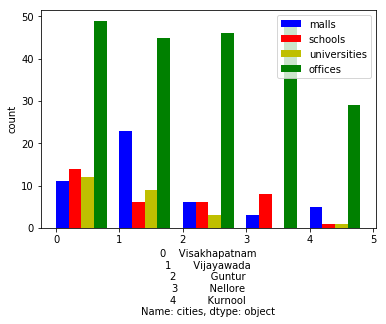

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# The data
malls = df_data['malls'].head()
highschools = df_data['high schools'].head()
universities=df_data['universities'].head()
offices=df_data['offices'].head()
indices = range(len(malls))
names = df_data['cities'].head()
# Calculate optimal width
width = np.min(np.diff(indices))/5.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(indices+width/2,malls,width,color='b',label='malls')
ax.bar(indices+width*3/2,highschools,width,color='r',label='schools')
ax.bar(indices+width*5/2,universities,width,color='y',label='universities')
ax.bar(indices+width*7/2,offices,width,color='g',label='offices')
ax.set_ylabel('count')
ax.set_xlabel(names)
ax.legend()
plt.show()

In [141]:
mall=-4
school=1
university=2
offices=3

In [142]:
df_weighted = df_data[['cities']].copy()

In [143]:
df_weighted['Score'] = df_data['malls'] * mall + df_data['high schools'] *school + df_data['universities'] * university + df_data['offices'] *offices
df_weighted = df_weighted.sort_values(by=['Score'], ascending=False)
df_weighted

,cities,Score
8,Tirupati,152.0
30,Amaravati (state capital),148.0
0,Visakhapatnam,141.0
3,Nellore,140.0
21,Bhimavaram,139.0
11,Vizianagaram,135.0
7,Kakinada,130.0
2,Guntur,126.0
9,Eluru,124.0
5,Rajahmundry,123.0


In [144]:
data=pd.merge(df_data,df_weighted, on='cities',how='outer')

In [145]:
data

,cities,Latitude,Longitude,malls,high schools,universities,offices,Score
0,Visakhapatnam,17.723128,83.301284,11.0,14.0,12.0,49.0,141.0
1,Vijayawada,16.508759,80.618510,23.0,6.0,9.0,45.0,67.0
2,Guntur,16.291519,80.454159,6.0,6.0,3.0,46.0,126.0
3,Nellore,14.449372,79.987376,3.0,8.0,0.0,48.0,140.0
4,Kurnool,15.830925,78.042537,5.0,1.0,1.0,29.0,70.0
5,Rajahmundry,17.005045,81.780473,2.0,3.0,1.0,42.0,123.0
6,Kadapa,14.467149,78.822888,0.0,1.0,0.0,20.0,61.0
7,Kakinada,16.943738,82.235061,4.0,3.0,4.0,45.0,130.0
8,Tirupati,13.631637,79.423171,2.0,2.0,4.0,50.0,152.0
9,Eluru,16.710426,81.115382,2.0,0.0,0.0,44.0,124.0


In [156]:
map_ap_result = folium.Map(location=[latitude, longitude], zoom_start=15)

ap_win = df3[df3['cities'] == 'Tirupati']

for lat, lng, local in zip(ap_win['Latitude'], ap_win['Longitude'], ap_win['cities']):
    label = '{}'.format(local)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_ap_result) 

addToMap(andhra_venues_malls[andhra_venues_malls['cities'] == 'Tirupati'], 'red', map_ap_result)
addToMap(ap_venues_highschools[ap_venues_highschools['cities'] == 'Tirupati'], 'green', map_ap_result)
addToMap(ap_venues_uni[ap_venues_uni['cities'] == 'Tirupati'] ,'gold', map_ap_result)
addToMap(ap_venues_office[ap_venues_office['cities'] == 'Tirupati'], 'fuchsia', map_ap_result)

map_ap_result